### Building MLP based makemore(https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words  = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [6]:
# build vocabulary of chars and mapping tofrom integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(f'{stoi=}')
print(f'{itos=}')

stoi={'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
itos={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [114]:
# build the dataset

block_size = 3 # context length: how many chars we take to predict next one?
X, Y = [], []
for w in words:
    
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [100]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [101]:
X[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [102]:
Y[:5]

tensor([ 5, 13, 13,  1,  0])

In [103]:
# build lookup table 
C = torch.randn((27,2))

emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [104]:
# init weights and biases for layer 1
W1 = torch.randn((6, 100)) # 100 is hyperparameter of size of neural net
b1 = torch.randn(100)

In [105]:
# 1st way to tansform dataset into 32*6 tensor
#torch.cat(torch.unbind(emb, 1), 1)

# more efficient way to trasform tensor
#emb.view(*number of train set*,6)

In [106]:
# hidden layer that represents matmul of embeddings and weights + biases
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

h

tensor([[ 1.0000, -0.9958,  0.8568,  ..., -0.9978, -0.9841, -1.0000],
        [ 0.9999, -0.9795,  0.9290,  ..., -0.9960, -0.9988, -1.0000],
        [ 0.9979, -0.2649,  0.9997,  ...,  0.1274, -0.9999, -0.9936],
        ...,
        [ 1.0000,  0.0117,  0.9997,  ...,  0.9931, -0.1114, -0.8357],
        [-0.9447,  0.9976,  0.8795,  ..., -0.9471,  0.9627, -0.9107],
        [ 0.9961,  0.8966,  0.9982,  ...,  0.6770, -0.9315, -0.9866]])

In [107]:
# init weights and biases for layer 2

W2 = torch.randn((100, 27)) # 100 is hyperparameter of size of neural net
b2 = torch.randn(27)

In [108]:
logits = h @ W2 + b2

#logits

In [109]:
counts = logits.exp()

In [110]:
prob = counts / counts.sum(1, keepdims = True)

In [111]:
prob.shape

torch.Size([32, 27])

In [112]:
# prob for next char(currently bad)
prob[torch.arange(32), Y]

tensor([1.8333e-10, 3.1095e-11, 1.9762e-12, 1.1045e-06, 2.0953e-01, 2.2093e-09,
        1.6495e-06, 1.0569e-12, 1.5310e-08, 2.1861e-06, 6.0590e-09, 6.2601e-04,
        9.5118e-01, 1.2274e-08, 6.3685e-01, 3.9300e-01, 1.1806e-07, 9.8643e-01,
        9.9385e-07, 4.0490e-03, 3.9729e-07, 9.9995e-01, 2.3302e-04, 6.9496e-06,
        8.5545e-12, 2.5875e-11, 1.5552e-04, 4.8448e-03, 2.0878e-11, 8.1605e-11,
        2.7780e-13, 3.9962e-06])

In [113]:
loss = -prob[torch.arange(32), Y].log().mean()

print('avg log-ikelihood loss-',loss)

avg log-ikelihood loss- tensor(14.0638)


In [70]:
# -----------more readable-----------

In [115]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [474]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [475]:
print(f'number of parameters total - {sum(p.nelement() for p in parameters)}')

number of parameters total - 11897


In [476]:
for p in parameters: p.requires_grad = True

In [481]:
steps = 10000
for _ in range(steps):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # 32*3*2 in case of block_size = 3 and train size 32
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Y[ix]) # more respectable for classification(what we are doing)
    
    #backward pass
    for p in parameters: p.grad = None
    loss.backward()

    # update
    for p in parameters: p.data += -0.01 * p.grad
        
print(loss.item())

1.825774073600769


In [482]:
emb = C[X] # 32*3*2 in case of block_size = 3 and train size 32
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2 # 32 * 27
loss = F.cross_entropy(logits, Y) # more respectable for classification(what we are doing)
print(loss.item())

2.192397117614746


## finding optimal initial lr

In [232]:
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
lrs[:10]

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011])

In [233]:
lri = []
lossi = []

for i in range(1000):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # 32*3*2 in case of block_size = 3 and train size 32
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Y[ix]) # more respectable for classification(what we are doing)
    #print(loss.item())
    
    #backward pass
    for p in parameters: p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters: p.data += -lr * p.grad
        
    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())

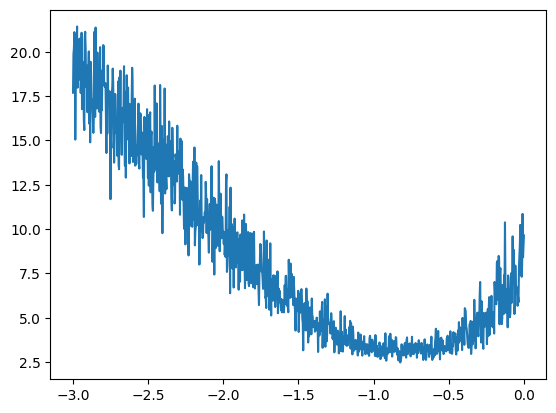

In [234]:
plt.plot(lri,lossi)

In [235]:
# optimal lr is 0.1

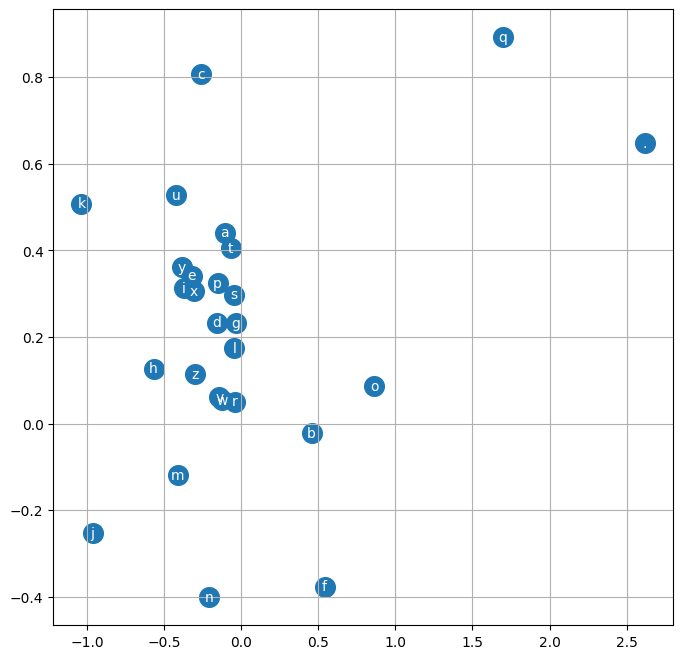

In [483]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [484]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
aar.
hari.
kemri.
rehty.
salaysa.
jazonte.
deliah.
jageli.
nellana.
chaiivia.
legg.
dham.
joce.
quintis.
lilea.
jadiquo.
jero.
dearuxiphi.
eveighan.
